<center><h1>Naukri.com</h1></center>
<center><h1>Exploratory Data analysis</h1></center>

___

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from dython import nominal

from IPython.core.display import HTML    # To centralize the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [123]:
df = pd.read_csv('job_data_prepared.csv')

In [124]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
df.head()

,title,company,ratings,reviews,experience,salary,location,days_posted,tags,job_simp,post,salary_mentioned,reviews_int,min_experience,max_experience,avg_experience,days_posted_int,bangalore,delhi,kolkata,mumbai,remote,gurgaon,hyderabad,noida,pune,python,sql,deep_learning,big_data,r,nlp,sas,git,tensorflow,pytorch,tableau,power_bi,apache,c++
0,Machine Learning (AI) Architect,Persistent,4.1,1781 Reviews,5-12 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",3 Days Ago,time analysis machine intelligence employee e...,mle,na,0,1781,5,12,8.5,3,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Data Scientist,Cognizant,4.0,31471 Reviews,8-10 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",30+ Days Ago,python R machine learning statistical program...,data scientist,na,0,31471,8,10,9.0,30,1,1,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Senior Data Scientist-New Frontiers,IDFC FIRST Bharat,4.2,458 Reviews,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",16 Days Ago,data automation frontier sql machine analysis...,data scientist,senior,0,458,3,7,5.0,16,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Data Scientist (HR),NCR Corporation,4.1,1009 Reviews,1-2 Yrs,Not disclosed,"Mumbai, New Delhi, Hyderabad/Secunderabad",30+ Days Ago,python data science business intelligence int...,data scientist,na,0,1009,1,2,1.5,30,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Data Science - Technical Lead,Paytm,3.7,4707 Reviews,6-8 Yrs,Not disclosed,"Noida, Bangalore/Bengaluru",30+ Days Ago,python data science science machine learning ...,na,senior,0,4707,6,8,7.0,30,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
df.describe()

,ratings,salary_mentioned,reviews_int,min_experience,max_experience,avg_experience,days_posted_int,bangalore,delhi,kolkata,mumbai,remote,gurgaon,hyderabad,noida,pune,python,sql,deep_learning,big_data,r,nlp,sas,git,tensorflow,pytorch,tableau,power_bi,apache,c++
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,3.929333,0.049524,1565.114286,3.971429,7.550476,5.760952,24.135238,0.382857,0.038095,0.022857,0.146667,0.060952,0.108571,0.165714,0.057143,0.129524,0.489524,0.352381,0.121905,0.034286,0.024762,0.076190,0.034286,0.026667,0.007619,0.015238,0.019048,0.017143,0.015238,0.030476
std,0.575134,0.217166,5187.675072,2.643793,3.309111,2.890082,9.042246,0.486547,0.191609,0.149590,0.354111,0.239471,0.311397,0.372179,0.232337,0.336099,0.500367,0.478167,0.327488,0.182136,0.155547,0.265556,0.182136,0.161261,0.087037,0.122615,0.136823,0.129927,0.122615,0.172057
min,1.300000,0.000000,2.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.700000,0.000000,10.000000,2.000000,5.000000,4.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,63.000000,3.000000,7.000000,5.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.200000,0.000000,528.000000,5.000000,10.000000,7.500000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,54038.000000,15.000000,20.000000,17.500000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


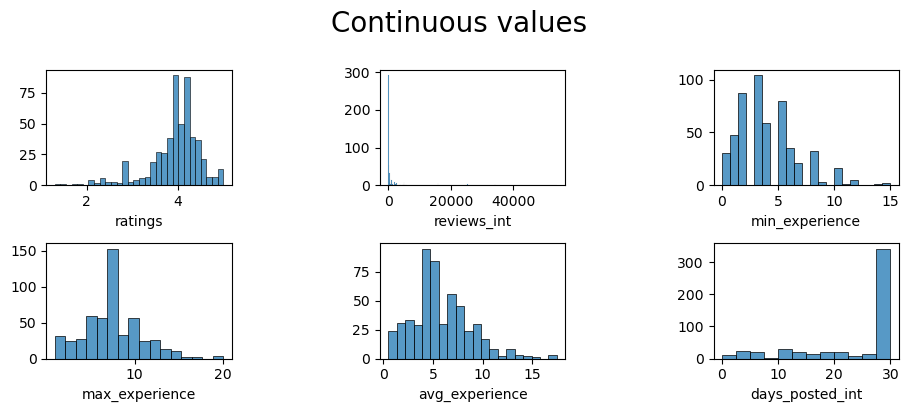

In [126]:
cont_cols = df.select_dtypes(exclude=["object_"]).loc[:,:"days_posted_int"].drop('salary_mentioned',axis=1)

def hist(column):
    sns.histplot(cont_cols.iloc[:,column], edgecolor='black')

for i in np.arange(6):
    plt.rcParams["figure.figsize"] = (11,6)
    plt.subplots_adjust(wspace=0.8,hspace=0.5)
    plt.subplot(3,3,i+1)
    plt.suptitle('Continuous values', fontsize=20)
    hist(i)
    plt.ylabel('')

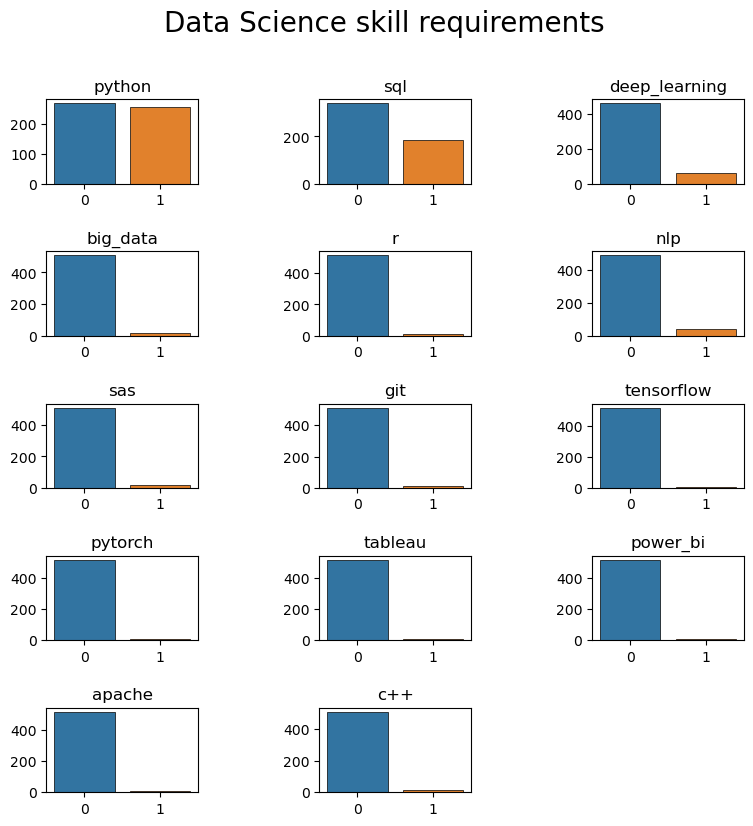

In [127]:
yn_cols = df.select_dtypes(exclude=["object_"]).loc[:,'python':]

def plot(column):
    sns.set_context(rc = {'patch.linewidth': 0.5})
    sns.barplot(x=yn_cols.iloc[:,column].value_counts().index,y=yn_cols.iloc[:,column].value_counts(),edgecolor='black')

for i in np.arange(14):
    plt.rcParams["figure.figsize"] = (9,9)
    plt.subplots_adjust(wspace=0.8,hspace=0.8)
    plt.subplot(5,3,i+1)
    plt.title(f'{yn_cols.columns[i]}')
    plt.suptitle('Data Science skill requirements', fontsize=20)
    plot(i)
    plt.ylabel('')

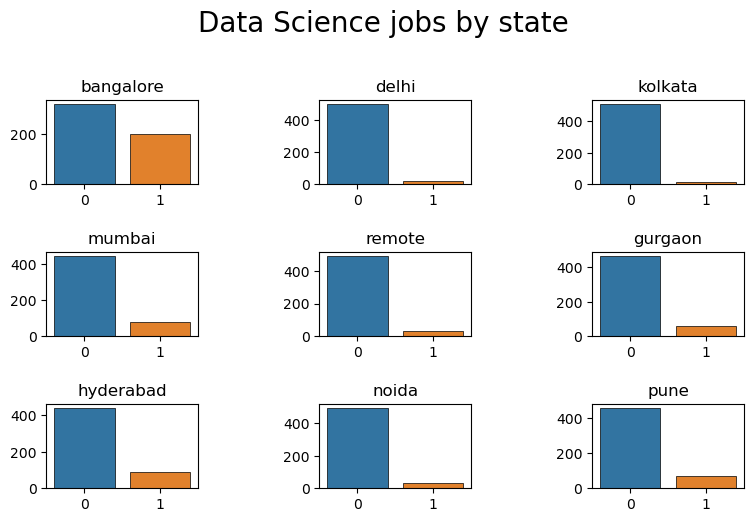

In [128]:
df_locs = df.loc[:,'bangalore':'pune']

def plot1(column):
    sns.set_context(rc = {'patch.linewidth': 0.5})
    ax = sns.barplot(x=df_locs.iloc[:,column].value_counts().index,y=df_locs.iloc[:,column].value_counts(),edgecolor='black')

for i in np.arange(9):
    plt.rcParams["figure.figsize"] = (9,9)
    plt.subplots_adjust(wspace=0.8,hspace=0.8)
    plt.subplot(5,3,i+1)
    plt.suptitle('Data Science jobs by state', fontsize=20)
    plt.title(f'{df_locs.columns[i]}')
    plot1(i)
    plt.ylabel('')

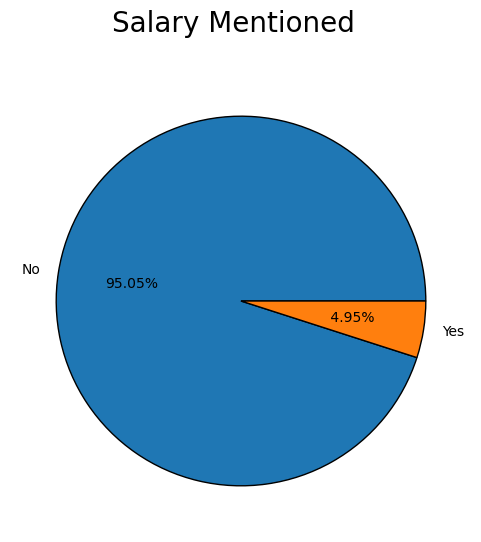

In [152]:
plt.rcParams["figure.figsize"] = (6,6)
plt.pie(df['salary_mentioned'].value_counts(), labels=['No','Yes'],autopct="%5.2f%%",\
        wedgeprops={"edgecolor":"k",'linewidth': 1})
plt.suptitle('Salary Mentioned',fontsize=20)
plt.show()

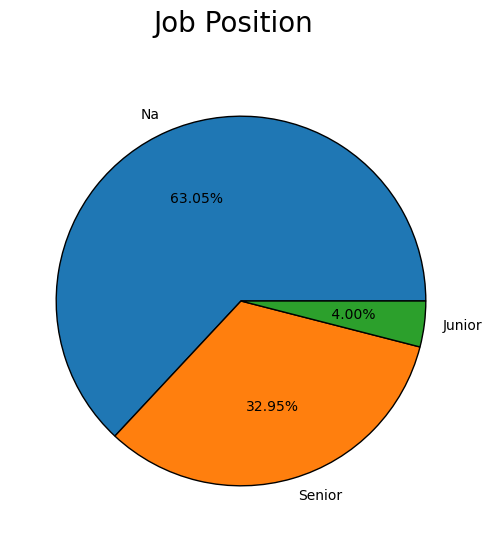

In [151]:
plt.rcParams["figure.figsize"] = (6,6)
plt.pie(df['post'].value_counts(), labels=['Na','Senior','Junior'], autopct="%5.2f%%", \
        wedgeprops={"edgecolor":"k",'linewidth': 1})
plt.suptitle('Job Position',fontsize=20)
plt.show()

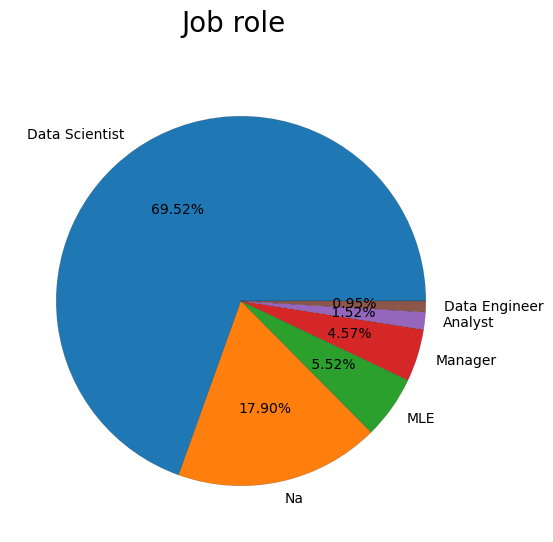

In [154]:
plt.pie(df['job_simp'].value_counts(), labels=['Data Scientist','Na','MLE','Manager','Analyst','Data Engineer'],\
        autopct="%5.2f%%", wedgeprops={"edgecolor":"k",'linewidth': 0.1})
plt.suptitle('Job role',fontsize=20)
plt.show()

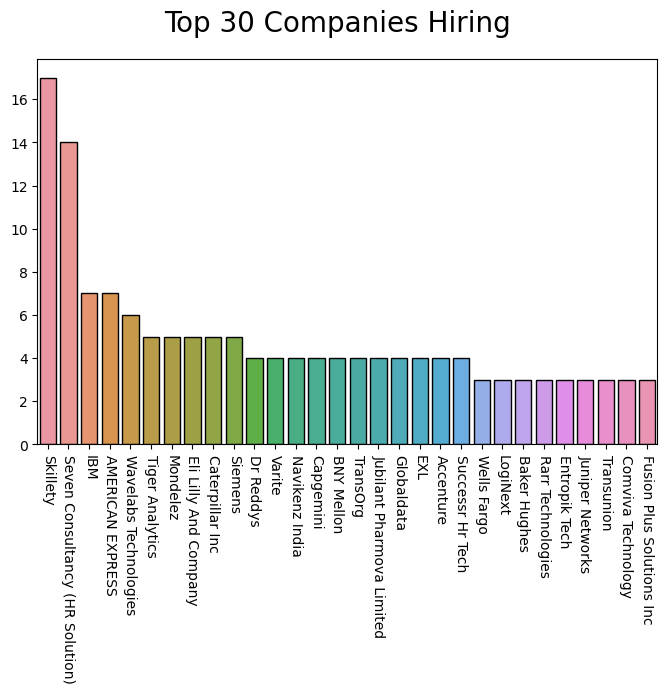

In [132]:
sns.barplot(x=df.company.value_counts()[:30].index, y=df.company.value_counts()[:30], edgecolor='black')
plt.suptitle('Top 30 Companies Hiring', fontsize=20)
plt.xticks(rotation=270)
plt.ylabel('')
plt.show()